## 패딩

### 1. Numpy 사용하기
- 저번 예제에서 사용한 토큰화 결과 사용

In [8]:
results=[
    ['문자', '인코딩', '인코딩', '사용자', '입력', '문자', '기호', '컴퓨터', '이용', '신호', '말'], 
    ['의미', '컴퓨터', '신호', '입력', '처리', '기계', '뜻', '신호', '처리', '시스템', '통해', '처리', '정보', '사용자', '이해'], 
    ['신호', '입력', '인코딩', '문자', '해독', '디코딩', '위해', '선', '미리', '정해진', '기준', '바탕', '입력', '해독', '처리', '문자열', '세트', '문자셋'], 
    ['초기', '보급', '컴퓨터', '문자열', '세트', '아스키', '표준', '문자열', '세트', '세계', '곳곳', '인터넷', '보급', '표현', '문자', '증가', '문자셋', '표준화', '위해', '대체', '방식', '개발'], 
    ['표준', '문자셋', '개발', '대한', '논의', '유니코드', '등장']
]

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

# 빈도수 높은 순으로 인덱스 부여 
tokenizer.fit_on_texts(results)

# 정수 인코딩
encoded = tokenizer.texts_to_sequences(results)
print(encoded)

[[1, 5, 5, 10, 2, 1, 16, 6, 17, 3, 18], [19, 6, 3, 2, 4, 20, 21, 3, 4, 22, 23, 4, 24, 10, 25], [3, 2, 5, 1, 11, 26, 12, 27, 28, 29, 30, 31, 2, 11, 4, 7, 8, 9], [32, 13, 6, 7, 8, 33, 14, 7, 8, 34, 35, 36, 13, 37, 1, 38, 9, 39, 12, 40, 41, 15], [14, 9, 15, 42, 43, 44, 45]]


In [10]:
# 동일한 길이로 맞춰주기 위해 가장 길이가 긴 문장 계산
max_len = max(len(item) for item in encoded)
print(max_len)

22


In [11]:
# 위에서 구한 제일 긴 문장 기준으로 다른 문장 길이 맞추기
for item in encoded: # 각 문장에 대해서
    while len(item) < max_len:   # max_len보다 작으면
        item.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  5, 10,  2,  1, 16,  6, 17,  3, 18,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [19,  6,  3,  2,  4, 20, 21,  3,  4, 22, 23,  4, 24, 10, 25,  0,
         0,  0,  0,  0,  0,  0],
       [ 3,  2,  5,  1, 11, 26, 12, 27, 28, 29, 30, 31,  2, 11,  4,  7,
         8,  9,  0,  0,  0,  0],
       [32, 13,  6,  7,  8, 33, 14,  7,  8, 34, 35, 36, 13, 37,  1, 38,
         9, 39, 12, 40, 41, 15],
       [14,  9, 15, 42, 43, 44, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0]])

### 2. Keras 텍스트 전처리 도구로 패딩

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


encoded_ker = tokenizer.texts_to_sequences(results)
print(encoded_ker)

[[1, 5, 5, 10, 2, 1, 16, 6, 17, 3, 18], [19, 6, 3, 2, 4, 20, 21, 3, 4, 22, 23, 4, 24, 10, 25], [3, 2, 5, 1, 11, 26, 12, 27, 28, 29, 30, 31, 2, 11, 4, 7, 8, 9], [32, 13, 6, 7, 8, 33, 14, 7, 8, 34, 35, 36, 13, 37, 1, 38, 9, 39, 12, 40, 41, 15], [14, 9, 15, 42, 43, 44, 45]]


In [13]:
# pad_sequences method 사용
padded = pad_sequences(encoded_ker)
padded

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  5, 10,  2,
         1, 16,  6, 17,  3, 18],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  6,  3,  2,  4, 20, 21,  3,  4,
        22, 23,  4, 24, 10, 25],
       [ 0,  0,  0,  0,  3,  2,  5,  1, 11, 26, 12, 27, 28, 29, 30, 31,
         2, 11,  4,  7,  8,  9],
       [32, 13,  6,  7,  8, 33, 14,  7,  8, 34, 35, 36, 13, 37,  1, 38,
         9, 39, 12, 40, 41, 15],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,
         9, 15, 42, 43, 44, 45]], dtype=int32)

In [14]:
# 뒤에서부터 채우려면 파라미터 값 추가 padding = 'post'
padded = pad_sequences(encoded_ker,padding = 'post')
padded

array([[ 1,  5,  5, 10,  2,  1, 16,  6, 17,  3, 18,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [19,  6,  3,  2,  4, 20, 21,  3,  4, 22, 23,  4, 24, 10, 25,  0,
         0,  0,  0,  0,  0,  0],
       [ 3,  2,  5,  1, 11, 26, 12, 27, 28, 29, 30, 31,  2, 11,  4,  7,
         8,  9,  0,  0,  0,  0],
       [32, 13,  6,  7,  8, 33, 14,  7,  8, 34, 35, 36, 13, 37,  1, 38,
         9, 39, 12, 40, 41, 15],
       [14,  9, 15, 42, 43, 44, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0]], dtype=int32)

In [15]:
# maxlen 파라미터로 패딩 길이 조절. default는 문장 중 최대 길이
padded = pad_sequences(encoded_ker, padding = 'post', maxlen = 5)
padded

array([[16,  6, 17,  3, 18],
       [23,  4, 24, 10, 25],
       [11,  4,  7,  8,  9],
       [39, 12, 40, 41, 15],
       [15, 42, 43, 44, 45]], dtype=int32)

In [16]:
# 숫자 0으로 패딩하는 것은 널리 퍼진 관례이다.
# 다른 숫자 사용하고싶으면 다른 단어들이랑 겹치지 않기 위해 
# 단어 집합 크기보다 +1인 값을 value 파라미터에 넣어주면됨.

last_value = len(tokenizer.word_index) + 1
print(last_value)

padded = pad_sequences(encoded_ker, padding = 'post', value = last_value)
padded

46


array([[ 1,  5,  5, 10,  2,  1, 16,  6, 17,  3, 18, 46, 46, 46, 46, 46,
        46, 46, 46, 46, 46, 46],
       [19,  6,  3,  2,  4, 20, 21,  3,  4, 22, 23,  4, 24, 10, 25, 46,
        46, 46, 46, 46, 46, 46],
       [ 3,  2,  5,  1, 11, 26, 12, 27, 28, 29, 30, 31,  2, 11,  4,  7,
         8,  9, 46, 46, 46, 46],
       [32, 13,  6,  7,  8, 33, 14,  7,  8, 34, 35, 36, 13, 37,  1, 38,
         9, 39, 12, 40, 41, 15],
       [14,  9, 15, 42, 43, 44, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46,
        46, 46, 46, 46, 46, 46]], dtype=int32)

## + 문장길이 분포 확인해보기
- 몇개 없어서 이렇게 나왔지만, 문서 양이 많다면 확인할 수 있을 것이다.

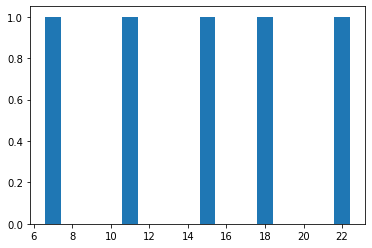

In [17]:
import matplotlib.pyplot as plt
from collections import defaultdict

# 0(int)을 default를 갖는 딕셔너리 생성
length_dic=defaultdict(int)

# 각 문장에 대해
for line in results:
    # 문장의 길이를 키로 하여 value는 몇개인지 저장
    length_dic[len(line)]+=1
    
plt.bar(length_dic.keys(),length_dic.values())
plt.show()